# PKIS2 dataset curation
## Backgroud:
 Kinases play a crucial role in cellular signalling, making them important targets for drug development. Dysregulation of kinases is frequently implicated in diseases like cancer, inflammation, and neurodegenerative disorders. Therefore, targeting kinases with specific drugs has emerged as a crucial strategy in modern drug discovery. Kinase-related task includes inhibition prediction, selectivity prediction, or kinase-ligand binding affinity prediction. In the early release version of Polaris, benchmarks were established for kinases such as EGFR, KIT, and RET, along with their respective mutations, as well as for LOK and SLK.


## Description of readout 
- **Readouts**: `EGFR`, `KIT`, `RET`, `LOK`, `SLK`
- **Bioassay readout**: Percentage of inhibition (%).
- **Optimization objective**: Higher potency (higher %inhibition).


## Data resource:
PKIS2: A second chemogenomics set of kinase inhibitors from GSK, Takeda, and Pfizer was assembled as PKIS2. This set contained 645 inhibitors and included many additional chemotypes that were not represented in the original set.

**Reference**: https://www.ncbi.nlm.nih.gov/pubmed/28767711


In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pathlib

import pandas as pd
import datamol as dm

root = pathlib.Path("__file__").absolute().parents[2]
# set to recipe root directory
os.chdir(root)
sys.path.insert(0, str(root))

In [2]:
org = "polaris"
data_name = "drewry2017_pkis2_subset"
dirname = dm.fs.join(root, f"org-{org}", data_name)
gcp_root = f"gs://polaris-public/polaris-recipes/org-{org}/{data_name}"

In [3]:
INDIR = "gs://polaris-public/data/raw"
OUTDIR = "gs://polaris-public/data/Kinases"

## Load the raw data
The dataset is published in https://pubmed.ncbi.nlm.nih.gov/26501955

In [4]:
source_data_path = f"{gcp_root}/data/raw/drewry_pone_2017_SI_S4_Table.xlsx"
data = pd.read_excel(source_data_path, sheet_name="Table 4 - PKIS2 %Inh")[:-1]

/Users/lu.zhu/miniconda3/envs/po_dataset/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [5]:
data

,Regno,Compound,Chemotype,Smiles,>90,>80,>70,AAK1,ABL1-nonphosphorylated,ABL1-phosphorylated,...,YANK3,YES,YSK1,YSK4,ZAK,ZAP70,p38-alpha,p38-beta,p38-delta,p38-gamma
0,GSK2358994,UNC10225469A,morpholino-triazolo-pyrimidinones,Clc1cccc(Cn2c(nn3c2nc(cc3=O)N2CCOCC2)C2CC2)c1Cl,2.0,3.0,3.0,14.0,28.0,20.0,...,0.0,9.0,0.0,0.0,12.0,10.0,0.0,8.0,4.0,23.0
1,GSK2593074,UNC10225012A,4-amino-3-aryl-thienopyridine and analogues,Cn1cc(cn1)-c1cnc(N)c2c(csc12)-c1ccc2N(CCc2c1)C...,27.0,36.0,42.0,0.0,99.7,89.0,...,0.0,55.0,6.0,43.0,59.0,0.0,8.0,1.0,0.0,14.0
2,GSK350559,UNC10225159A,4-pyrimidinyl_ortho-aryl_azoles,CS(=O)(=O)Cc1ccc(Nc2nccc(n2)-c2c(nn3ncccc23)-c...,5.0,10.0,12.0,0.0,8.0,15.0,...,3.0,36.0,0.0,16.0,15.0,22.0,2.0,6.0,0.0,43.0
3,GSK361065,UNC10225310A,4-pyrimidinyl_ortho-aryl_azoles,COc1cccc(OC)c1C(=O)Nc1cccc(c1)-c1nn2ccccc2c1-c...,12.0,19.0,19.0,0.0,28.0,18.0,...,0.0,36.0,1.0,0.0,66.0,0.0,21.0,90.0,11.0,24.0
4,GSK955403,UNC10225187A,diarylurea,Cc1ccc(NC(=O)Nc2cccc(c2)C(F)(F)F)cc1,3.0,4.0,4.0,26.0,49.0,23.0,...,0.0,10.0,0.0,0.0,39.0,0.0,10.0,57.0,0.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,SKF-18355,UNC10243862A,6-aminopurines and related,CNc1ncnc2[nH]ncc12,1.0,2.0,2.0,0.0,34.0,11.0,...,0.0,0.0,0.0,46.0,0.0,24.0,6.0,8.0,0.0,0.0
641,AH5015,UNC10243863A,6-aminopurines and related,Nc1ncnc2[nH]c(nc12)-c1ccccc1,11.0,11.0,13.0,0.0,7.0,44.0,...,9.0,18.0,0.0,94.4,33.0,0.0,0.0,0.0,6.0,0.0
642,GSK682037,UNC10243880A,5-Ar-indazole,OC(=O)C(F)(F)F.Cc1n[nH]c2ccc(cc12)-c1cc(OC[C@@...,43.0,61.0,73.0,61.0,13.0,33.0,...,94.5,38.0,17.0,99.5,0.0,0.0,89.0,36.0,73.0,72.0
643,GSK2363608,UNC10243881A,morpholino-triazolo-pyrimidinones,CSc1nn2c(nc(cc2=O)N2CCOCC2)n1Cc1cccc(c1C)C(F)(F)F,3.0,3.0,5.0,25.0,0.0,0.0,...,68.0,22.0,0.0,30.0,0.0,0.0,0.0,0.0,34.0,0.0


### Define data columns and structure column. Remove empty rows.

In [6]:
data.rename(columns={col: col.replace(" ", "_") for col in data.columns}, inplace=True)
mol_col = "Smiles"
data_cols = ["EGFR", "KIT", "LOK", "RET", "SLK"]
data = data[[mol_col] + data_cols]
data = data.dropna(subset=data_cols, how="all", axis=0)

In [7]:
data.describe(include="all")

,Smiles,EGFR,KIT,LOK,RET,SLK
count,645,645.000000,645.000000,645.000000,645.000000,645.000000
unique,640,NaN,NaN,NaN,NaN,NaN
top,Cl.Cl.Cl.Fc1ccc(cc1)-c1ncn(C2CCNCC2)c1-c1ccnc(...,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN
mean,NaN,27.068992,38.421705,23.525271,25.217209,25.404806
std,NaN,28.286400,37.200283,34.158873,31.852410,29.519803
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,4.000000,6.000000,0.000000,0.000000,1.000000
50%,NaN,20.000000,23.000000,3.000000,12.000000,15.000000
75%,NaN,36.000000,73.000000,32.000000,32.000000,34.000000


### Define threshold for classification conversion
> The authors of the referenced paper used a stringent threshold of `% inhibition > 90` to identify hits. In this study, we relaxed the thresholds based on the distributions.

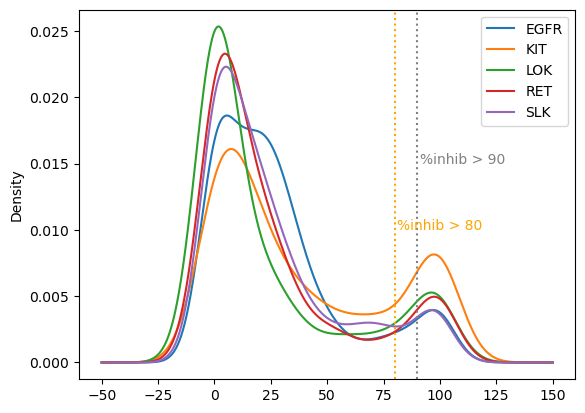

In [8]:
from matplotlib import pyplot as plt

data[data_cols].plot.kde()
plt.text(81, 0.01, "%inhib > 80", color="orange")
plt.axvline(x=80, linestyle="dotted", color="orange")
plt.text(91, 0.015, "%inhib > 90", color="grey")
plt.axvline(x=90, linestyle="dotted", color="grey")

### Run preliminary curation for data inspection
> See detailed documention of the data curation in [Auroris](https://github.com/polaris-hub/auroris)

### Perform data curation with `auroris.curation` module
The curation process includes:
- assign unique identifier to molecules
- detect the stereochemistry information of molecules.
- inspect the potential outliers of bioactivity values
- merge rows of replicated molecules
- detect isomers which show the activity shifts

Check out the curation module in [Auroris](https://github.com/polaris-hub/auroris). 

In [9]:
# import key curation components from auroris
from auroris.curation import Curator
from auroris.curation.actions import (
    MoleculeCuration,
    OutlierDetection,
    Deduplication,
    StereoIsomerACDetection,
    ContinuousDistributionVisualization,
    Discretization,
)

# Define the curation workflow
curator = Curator(
    data_path=source_data_path,
    steps=[
        MoleculeCuration(input_column=mol_col, y_cols=data_cols),
        Discretization(input_column="EGFR", thresholds=[80], label_order="ascending"),
        Discretization(input_column="KIT", thresholds=[80], label_order="ascending"),
        Discretization(input_column="RET", thresholds=[80], label_order="ascending"),
        Discretization(input_column="LOK", thresholds=[80], label_order="ascending"),
        Discretization(input_column="SLK", thresholds=[80], label_order="ascending"),
        OutlierDetection(
            method="zscore", columns=data_cols, threshold=3, use_modified_zscore=True
        ),
        StereoIsomerACDetection(y_cols=[f"CLS_{col}" for col in data_cols]),
    ],
    parallelized_kwargs={"n_jobs": -1},
)

curator.to_json(f"{dirname}/inspection_config.json")

In [10]:
# Run the curation step defined as above
data_inspection, report = curator(data)

2024-07-30 13:46:37.216 | INFO     | auroris.curation._curator:transform:106 - Performing step: mol_curation
2024-07-30 13:46:54.329 | INFO     | auroris.curation._curator:transform:106 - Performing step: discretize
2024-07-30 13:46:54.395 | INFO     | auroris.curation._curator:transform:106 - Performing step: discretize
2024-07-30 13:46:54.472 | INFO     | auroris.curation._curator:transform:106 - Performing step: discretize
2024-07-30 13:46:54.542 | INFO     | auroris.curation._curator:transform:106 - Performing step: discretize
2024-07-30 13:46:54.596 | INFO     | auroris.curation._curator:transform:106 - Performing step: discretize
2024-07-30 13:46:54.647 | INFO     | auroris.curation._curator:transform:106 - Performing step: outlier_detection
2024-07-30 13:46:54.884 | INFO     | auroris.curation._curator:transform:106 - Performing step: ac_stereoisomer


In [13]:
#  get the curation logger
from auroris.report.broadcaster import LoggerBroadcaster

broadcaster = LoggerBroadcaster(report)
broadcaster.broadcast()

===== Curation Report =====
Time: 2024-07-30 13:46:37
Version: 0.1.4.dev10+g6715566
===== mol_curation =====
[LOG]: New column added: MOL_smiles
[LOG]: New column added: MOL_molhash_id
[LOG]: New column added: MOL_molhash_id_no_stereo
[LOG]: New column added: MOL_num_stereoisomers
[LOG]: New column added: MOL_num_undefined_stereoisomers
[LOG]: New column added: MOL_num_defined_stereo_center
[LOG]: New column added: MOL_num_undefined_stereo_center
[LOG]: New column added: MOL_num_stereo_center
[LOG]: New column added: MOL_undefined_E_D
[LOG]: New column added: MOL_undefined_E/Z
[LOG]: Default `ecfp` fingerprint is used to visualize the chemical space.
[LOG]: Molecules with undefined stereocenter detected: 65.
[IMG]: Dimensions 2400 x 1800
[IMG]: Dimensions 1200 x 2400
===== discretize =====
[LOG]: New column added: CLS_EGFR
[IMG]: Dimensions 1200 x 600
===== discretize =====
[LOG]: New column added: CLS_KIT
[IMG]: Dimensions 1200 x 600
===== discretize =====
[LOG]: New column added: CLS

In [14]:
# Generate an HTML report with embedded visualizations showcasing the data analysis.
from utils.auroris_utils import HTMLBroadcaster

# export report to local directory
broadcaster = HTMLBroadcaster(report, f"{dirname}/inspection_report")
report_path = broadcaster.broadcast()

In [15]:
# check the curated data
data_inspection.describe(include="all")

,Smiles,EGFR,KIT,LOK,RET,SLK,MOL_smiles,MOL_molhash_id,MOL_molhash_id_no_stereo,MOL_num_stereoisomers,...,OUTLIER_EGFR,OUTLIER_KIT,OUTLIER_LOK,OUTLIER_RET,OUTLIER_SLK,AC_CLS_EGFR,AC_CLS_KIT,AC_CLS_LOK,AC_CLS_RET,AC_CLS_SLK
count,645,645.000000,645.000000,645.000000,645.000000,645.000000,645,645,645,645.000000,...,645,645,645,645,645,645,645,645,645,645
unique,640,NaN,NaN,NaN,NaN,NaN,640,640,637,NaN,...,1,1,1,1,1,2,1,1,1,2
top,Cl.Cl.Cl.Fc1ccc(cc1)-c1ncn(C2CCNCC2)c1-c1ccnc(...,NaN,NaN,NaN,NaN,NaN,Fc1ccc(-c2ncn(C3CCNCC3)c2-c2ccnc(Nc3ccccc3)n2)cc1,613bcc501ef7e62eb9b0fcc8fd78dd8a29c79943,a64ae5c685fac2dc4599933b8483d9e8347448d7,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,2,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,...,645,645,645,645,645,643,645,645,645,643
mean,NaN,27.068992,38.421705,23.525271,25.217209,25.404806,NaN,NaN,NaN,1.009302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,28.286400,37.200283,34.158873,31.852410,29.519803,NaN,NaN,NaN,0.096073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.000000,6.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,20.000000,23.000000,3.000000,12.000000,15.000000,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,36.000000,73.000000,32.000000,32.000000,34.000000,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check the activity shift between the stereo isomers or duplicated molecules



![ac_stereo_CLS_SLK](inspection_report/images/13-Activity_shifts_among_stereoisomers__CLS_SLK.png)

![ac_stereo_CLS_EGFR](inspection_report/images/12-Activity_shifts_among_stereoisomers__CLS_EGFR.png)




In [17]:
# Check the stereoisomers
data_inspection.loc[[195, 196, 562, 563], data_cols + ["MOL_num_stereoisomers"]]

,EGFR,KIT,LOK,RET,SLK,MOL_num_stereoisomers
195,22.0,44.0,12.0,28.0,89.0,1
196,15.0,28.0,0.0,19.0,75.0,1
562,90.1,12.0,35.0,8.0,28.0,1
563,72.0,0.0,2.0,20.0,0.0,1


No activity shifts have been detected in the dataset. The above molecules are replicated in the dataset, and their values will be averaged during the `Deduplication` step.

## Rerun data curation and export curated data for downstream tasks


### Rerun the curation steps

In [18]:
# import key curation components from auroris
from auroris.curation import Curator
from auroris.curation.actions import (
    MoleculeCuration,
    OutlierDetection,
    Deduplication,
    StereoIsomerACDetection,
    ContinuousDistributionVisualization,
    Discretization,
)

# Define the curation workflow
curator = Curator(
    data_path=source_data_path,
    steps=[
        MoleculeCuration(input_column=mol_col, y_cols=data_cols),
        Deduplication(
            deduplicate_on=mol_col, y_cols=data_cols
        ),  # remove the replicated molecules
        Discretization(input_column="EGFR", thresholds=[80], label_order="ascending"),
        Discretization(input_column="KIT", thresholds=[80], label_order="ascending"),
        Discretization(input_column="RET", thresholds=[80], label_order="ascending"),
        Discretization(input_column="LOK", thresholds=[80], label_order="ascending"),
        Discretization(input_column="SLK", thresholds=[80], label_order="ascending"),
        OutlierDetection(
            method="zscore", columns=data_cols, threshold=3, use_modified_zscore=True
        ),
        StereoIsomerACDetection(y_cols=[f"CLS_{col}" for col in data_cols]),
    ],
    parallelized_kwargs={"n_jobs": -1},
)
# The final curation configuration is exported for reproducibility
path = f"{gcp_root}/data/curation/curation_config.json"
curator.to_json(path)

In [19]:
# Run the curation step defined as above
data_curated, report = curator(data)

2024-07-30 13:47:36.856 | INFO     | auroris.curation._curator:transform:106 - Performing step: mol_curation
2024-07-30 13:47:39.327 | INFO     | auroris.curation._curator:transform:106 - Performing step: deduplicate
2024-07-30 13:47:39.671 | INFO     | auroris.curation._curator:transform:106 - Performing step: discretize
2024-07-30 13:47:39.725 | INFO     | auroris.curation._curator:transform:106 - Performing step: discretize
2024-07-30 13:47:39.779 | INFO     | auroris.curation._curator:transform:106 - Performing step: discretize
2024-07-30 13:47:39.830 | INFO     | auroris.curation._curator:transform:106 - Performing step: discretize
2024-07-30 13:47:39.881 | INFO     | auroris.curation._curator:transform:106 - Performing step: discretize
2024-07-30 13:47:40.032 | INFO     | auroris.curation._curator:transform:106 - Performing step: outlier_detection
2024-07-30 13:47:40.263 | INFO     | auroris.curation._curator:transform:106 - Performing step: ac_stereoisomer


In [20]:
# Export report to polaris public directory on GCP
# The report is ready to reviewed in the HTML file.
broadcaster = HTMLBroadcaster(
    report, f"{gcp_root}/data/curation/report", embed_images=True
)
broadcaster.broadcast()

'gs://polaris-public/polaris-recipes/org-polaris/drewry2017_pkis2_subset/data/curation/report/index.html'

In [21]:
broadcaster = LoggerBroadcaster(report)
broadcaster.broadcast()

===== Curation Report =====
Time: 2024-07-30 13:47:36
Version: 0.1.4.dev10+g6715566
===== mol_curation =====
[LOG]: New column added: MOL_smiles
[LOG]: New column added: MOL_molhash_id
[LOG]: New column added: MOL_molhash_id_no_stereo
[LOG]: New column added: MOL_num_stereoisomers
[LOG]: New column added: MOL_num_undefined_stereoisomers
[LOG]: New column added: MOL_num_defined_stereo_center
[LOG]: New column added: MOL_num_undefined_stereo_center
[LOG]: New column added: MOL_num_stereo_center
[LOG]: New column added: MOL_undefined_E_D
[LOG]: New column added: MOL_undefined_E/Z
[LOG]: Default `ecfp` fingerprint is used to visualize the chemical space.
[LOG]: Molecules with undefined stereocenter detected: 65.
[IMG]: Dimensions 2400 x 1800
[IMG]: Dimensions 1200 x 2400
===== deduplicate =====
[LOG]: Deduplication merged and removed 5 duplicated molecules from dataset
===== discretize =====
[LOG]: New column added: CLS_EGFR
[IMG]: Dimensions 1200 x 600
===== discretize =====
[LOG]: New co

## Export the final curated data

In [22]:
fout = f"{gcp_root}/data/curation/{data_name}_curated_v3.csv"
data_curated.reset_index(drop=True).to_csv(fout, index=False)

In [23]:
fout

'gs://polaris-public/polaris-recipes/org-polaris/drewry2017_pkis2_subset/data/curation/drewry2017_pkis2_subset_curated_v3.csv'

<div style="background-color: lightyellow; padding: 10px; border: 1px solid black;">
    <strong><span style="color: red;">Disclaimer:</span></strong> 
        <ul>
        <strong>Pros:</strong>
        <li>The dataset was generated by one group that carried out the assays under a consistent set of conditions.</li>
        <li>Dataset contains only a small number of molecules with unspecified stereocenters.</li>
        <li>There are no duplicate structures in the dataset.</li>
        <li>The data is based on a well-defined biomedical endpoints</li>
        </ul>
        <ul>
        <strong>Cons:</strong>
        <li>The assay endpoint is % inhibition, which is less desirable than a dose-response but similar to what is commonly encountered with HTS data.</li>
        <li>The dataset is relatively small, containing only 640 compounds combined with the high degree of clustering in the dataset. This combination make it difficult to detect statistically significant differences between methods.</li>
        </ul>
        
</div>
